<a href="https://colab.research.google.com/github/wbandabarragan/computational-physics-1/blob/main/unit-1/107-Python-Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Review of Python Functions

## 1. Built-in Functions:

In [1]:
print(type(len))
print(type(abs))
print(type(max))
#print(type(sin))

<class 'builtin_function_or_method'>
<class 'builtin_function_or_method'>
<class 'builtin_function_or_method'>


## 2. Third-party function:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

In [3]:
print(type(np.sin))
print(type(plt.plot))
print(sc.optimize.minimize)

<class 'numpy.ufunc'>
<class 'function'>
<function minimize at 0x10f1949a0>


## 3. Our own functions:

Customised functions have:

1. Header: ``def name(arguments):``

2. Body: Needs to be indented, statements (docstrings), finishes with ``return ___``

### Example on thermodynamics:

$$pV=NRT$$

$$p = n k_B T$$, where $n = \frac{\rho}{\mu m}$


Write a function to compute the thermal pressure:


In [4]:
# Importing scipy

import scipy.constants as ct

In [5]:
# Example:

# Boltzmann constant k_B:
#k_b_old = 1.380649e-23 #m2 kg s-2 K-1

# Fetch the SI value from scipy
k_b = ct.k
#print(k_b_old, k_b)

k_b2 = ct.Boltzmann
print(k_b)
print(k_b2)

1.380649e-23
1.380649e-23


In [6]:
# Header
def thermal_pressure(nden, temp):
  # Body
  # Docstring:
  """
  Function used to compute the thermal pressure of ideal gases.
  Inputs: nden (number density), temp (temperature)
  Output: prs (pressure)
  Author: W.E.B.B.
  Date created: 28/04/2302
  Date modified: 26/02/2024
  Second modification: 19/02/2025
  Third modification: 1/09/2025
  """

  # What you compute
  prs = nden*k_b*temp

  # What you return
  return prs

In [7]:
# Get help on how to use the function

help(thermal_pressure)

Help on function thermal_pressure in module __main__:

thermal_pressure(nden, temp)
    Function used to compute the thermal pressure of ideal gases.
    Inputs: nden (number density), temp (temperature)
    Output: prs (pressure)
    Author: W.E.B.B.
    Date created: 28/04/2302
    Date modified: 26/02/2024
    Second modification: 19/02/2025
    Third modification: 1/09/2025



In [8]:
# Call the function
ndens1 = 100. #m^{-3}
temp1 = 290 #K

# Evaluating the function
pres1 = thermal_pressure(ndens1, temp1)

print("The pressure in N/m^2 is:", round(pres1, 22))

The pressure in N/m^2 is: 4.004e-19


In [9]:
# Call the function: atmospheric gas
ndens2 = 2.5e25 #m^{-3}
temp2 = 290 #K

# Evaluating the function
pres2 = thermal_pressure(ndens2, temp2)

print("The pressure in N/m^2 is:", round(pres2, 22))

The pressure in N/m^2 is: 100097.0525


In [10]:
# Call the function: the Sun
ndens3 = 1.e10 #m^{-3}
temp3 = 1.e6 #K

# Evaluating the function
pres3 = thermal_pressure(ndens3, temp3)

print("The pressure in N/m^2 is:", round(pres3, 22))

The pressure in N/m^2 is: 1.380649e-07


In [11]:
# Evaluate function using vectors
n_vector = np.arange(-3., 26., 0.1) # in log10 scale
T_vector = np.arange(1., 9., 0.1) # in log10 scale

# Create a 2D grid
n_2D, T_2D = np.meshgrid(n_vector, T_vector)

print(n_vector.shape)
print(T_vector.shape)
print(n_2D.shape, T_2D.shape)

(290,)
(80,)
(80, 290) (80, 290)


In [12]:
# Call the function:

pres_2D = thermal_pressure(10**n_2D, 10**T_2D) # This is to fee the function with linear quantities

print(pres_2D.shape)

(80, 290)


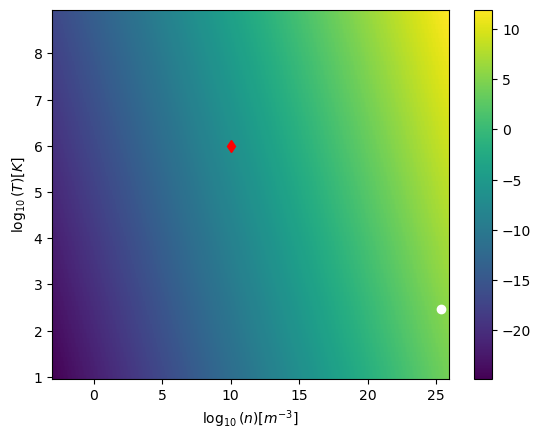

In [13]:
# Ready to plot the solution (2d array)

plt.figure()

# This is to plot a surface
Z = plt.pcolor(n_2D, T_2D, np.log10(pres_2D))

plt.plot(np.log10(ndens2), np.log10(temp2), linestyle = " ", marker = "o", color = "white")
plt.plot(np.log10(ndens3), np.log10(temp3), linestyle = " ", marker = "d", color = "red")

# Add a colour bar
plt.colorbar(Z)

# Axes labels
plt.xlabel(r"$\log_{10}(n) [m^{-3}]$")
plt.ylabel(r"$\log_{10}(T) [K]$")

plt.show()

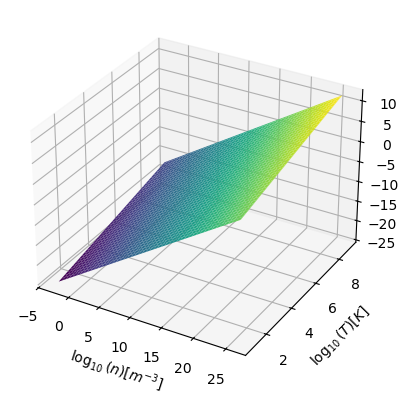

In [14]:
# Surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(n_2D, T_2D, np.log10(pres_2D), cmap = 'viridis')

ax.set_xlabel(r"$\log_{10}(n) [m^{-3}]$")
ax.set_ylabel(r"$\log_{10}(T) [K]$")

plt.show()

### Example on thermodynamics: Multiple returned objects

Remember:

$\rho= \mu\,m\,n$

where: $\mu$ is related to the composition of the gas, $m\equiv$ 1 atomic mass unit.



In [15]:
# Define 1 amu
m = ct.atomic_mass
print(m)

# Fix mu for ionised gas
mu_i = 0.6

1.66053906892e-27


In [16]:
# New function
def thermal_gas(nden, temp):
    # Body
    """
    Function used to compute the thermal pressure of ideal gases
    Inputs: nden (number density), temp (temperature)
    Output: prs (pressure), den (mass density)
    Author: W.E.B.B.
    Date created: 28/04/23
    Date modified: 26/02/2024
    """

    # What you compute: thermal pressure
    prs = nden*k_b*temp

    # New: mass density
    den = mu_i*nden*m

    # What you return
    return prs, den


In [17]:
help(thermal_gas)

Help on function thermal_gas in module __main__:

thermal_gas(nden, temp)
    Function used to compute the thermal pressure of ideal gases
    Inputs: nden (number density), temp (temperature)
    Output: prs (pressure), den (mass density)
    Author: W.E.B.B.
    Date created: 28/04/23
    Date modified: 26/02/2024



In [18]:
# Call the new function:

pres_2D, dens_2D = thermal_gas(10**n_2D, 10**T_2D) # This is to fee the function with linear quantities

print(pres_2D.shape, dens_2D.shape)

(80, 290) (80, 290)


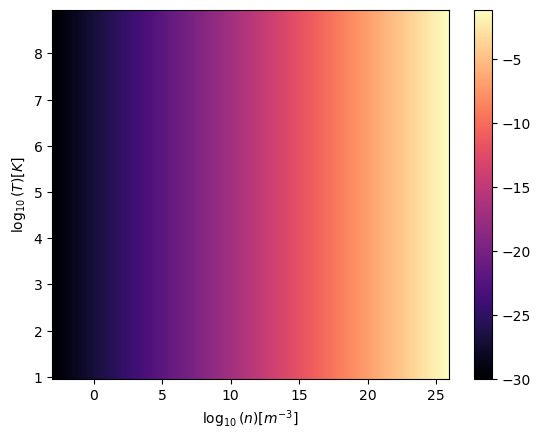

In [19]:
# Ready to plot the density solution (2d array)

plt.figure()

# This is to plot a surface
Z = plt.pcolor(n_2D, T_2D, np.log10(dens_2D), cmap = "magma")

# Add a colour bar
plt.colorbar(Z)

# Axes labels
plt.xlabel(r"$\log_{10}(n) [m^{-3}]$")
plt.ylabel(r"$\log_{10}(T) [K]$")

plt.show()

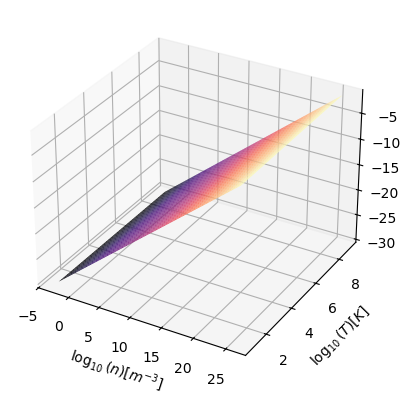

In [20]:
# Surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(n_2D, T_2D, np.log10(dens_2D), cmap = 'magma')

ax.set_xlabel(r"$\log_{10}(n) [m^{-3}]$")
ax.set_ylabel(r"$\log_{10}(T) [K]$")

plt.show()

## 4. Lambda Functions:

These are used to quickly define and use functions.

``lambda arguments: expression``

### Example:

$f(x)=x^3$

In [21]:
# We want to calculate the cube of a vector/array

def cube_function(x):
    """
    A function to cube a number/vector/array
    """
    cube_x = x**3

    return cube_x


In [22]:
# Call the funtion
x_1D = np.arange(0., 10., 1.)
y_1D = cube_function(x_1D)

print(x_1D)
print(y_1D)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[  0.   1.   8.  27.  64. 125. 216. 343. 512. 729.]


In [23]:
# Instead we can use a lambda function
z_1D = lambda x: x**3

print(type(z_1D))
print(z_1D(x_1D))

<class 'function'>
[  0.   1.   8.  27.  64. 125. 216. 343. 512. 729.]


### Example: Lambda functions for surfaces

$z = f(x,y) = \sin(x) + \cos(y) + y$

In [24]:
# Instead we can use a lambda function
# Create 1D vectors
x = np.arange(-2*np.pi, +2*np.pi, 0.01)
y = np.arange(-2*np.pi, +2*np.pi, 0.01)

# Create 2D arrays for the grid
x_2D, y_2D = np.meshgrid(x, y)

# Define a surface with a lambda function
z_2D = lambda x, y: np.sin(x) + np.cos(y) + y

# Checking stuff
print(z_2D(x_2D, y_2D).shape)

(1257, 1257)


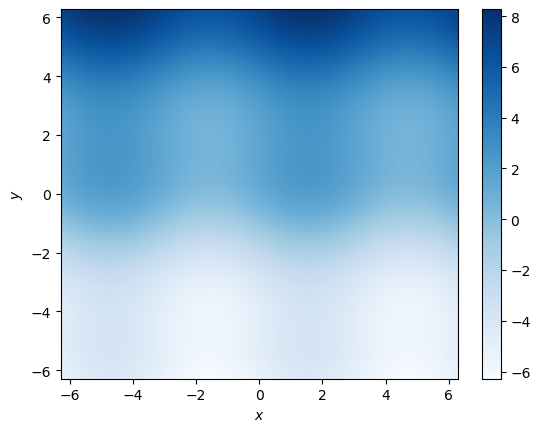

In [25]:
# Ready to plot the density solution (2d array)

plt.figure()

# This is to plot a surface
Z = plt.pcolor(x_2D, y_2D, z_2D(x_2D, y_2D), cmap = "Blues")

# Add a colour bar
plt.colorbar(Z)

# Axes labels
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")


plt.show()

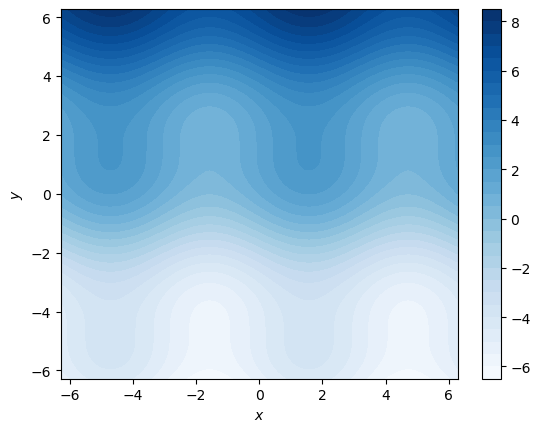

In [26]:
# Ready to plot the density solution (2d array)

plt.figure()

# This is to plot a surface
Z = plt.contourf(x_2D, y_2D, z_2D(x_2D, y_2D), 30,  cmap = "Blues")

# Add a colour bar
plt.colorbar(Z)

# Axes labels
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.show()

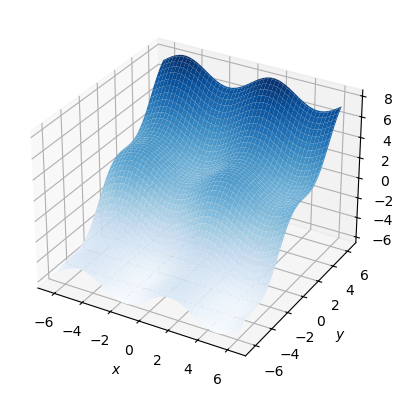

In [27]:
# Surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x_2D, y_2D, z_2D(x_2D, y_2D), cmap = "Blues")

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")

plt.show()

## 5. Nested functions:

A function inside a function.

Normally, when we want to simply the code, it is worth calling a function from within another function.


### Example:

Compute distances between three particles in 3D using a metric:

$d_{12} =\sqrt{(x_2-x_1)^2 + (y_2-y_1)^2 + (z_2-z_1)^2  }$

In [28]:
# Let's hard code this function

def distance_3d(p1, p2, p3):
    """
    This is to calculate distances between 3 particles in 3D
    Inputs: p1(x1,y1,z1), p2(x2,y2,z2), p3(x3,y3,z3) are 3D coordinates of each particle
    Outputs: d_12, d_13, d_23 are distances between teh particles
    """

    d_12 = np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2 + (p1[2] - p2[2])**2)
    d_13 = np.sqrt((p1[0] - p3[0])**2 + (p1[1] - p3[1])**2 + (p1[2] - p3[2])**2)
    d_23 = np.sqrt((p3[0] - p2[0])**2 + (p3[1] - p2[1])**2 + (p3[2] - p2[2])**2)

    return d_12, d_13, d_23


In [33]:
# Call the function:
# Define 3D coordinates of th particles

part_1 = (0., 0., 0.)
part_2 = (1., 1., 1.)
part_3 = (3., -3., 3.)

# Unpack outputs
dist_12, dist_13, dist_23 = distance_3d(part_1, part_2, part_3)

print(dist_12, dist_13, dist_23)
print(type(dist_12))

print(dist_12.round(3), dist_13.round(3), dist_23.round(3))

1.7320508075688772 5.196152422706632 4.898979485566356
<class 'numpy.float64'>
1.732 5.196 4.899


In [34]:
# 2nd method
# Let's use nested functions

# Parent function / Main function
def metric_3d(p1, p2, p3):
    """
    This is to calculate distances between 3 particles in 3D
    Inputs: p1, p2, p3 are 3D coordinates of each particle
    Outputs: d_12, d_13, d_23 are distances between teh particles
    """

    # Nested function / Child function
    def metric(o1, o2):
        """
        This is to compute the distance between two of the particles.
        Inputs: o1 - object1, o2 - object2
        Outputs: distance between objects 1 and 2
        """
        met = np.sqrt((o1[0] - o2[0])**2 + (o1[1] - o2[1])**2 + (o1[2] - o2[2])**2)

        return met

    d_12 = metric(p1, p2)
    d_13 = metric(p1, p3)
    d_23 = metric(p2, p3)

    return d_12, d_13, d_23

In [35]:
# Unpack outputs
met_12, met_13, met_23 = metric_3d(part_1, part_2, part_3)

print(met_12, met_13, met_23)

1.7320508075688772 5.196152422706632 4.898979485566356


## 6. Recursive function:

This is a nested function, where we call the main function again.

### Example:

$f(n)=n!$

If $n=1$, $f(n=1)=1$

If $n$ takes any other value, $n\,f(n-1)$

In [39]:
# Example

def factorial(n):
  """
  Calculate and return the factorial of n, which is a positive integer
  """

  if n == 1 or n==0:
    # First case
    f_1 = 1
    return f_1
  else:
    # Other cases, we do a recursive call
    f_2 = n*factorial(n-1)
    return f_2


In [37]:
# Call the function
n_1 = 0
y_1 = factorial(n_1)
print(y_1)

n_2 = 7
y_2 = factorial(n_2)
print(y_2)

1
5040


In [38]:
7*6*5*4*3*2*1

5040

## 7. Functions can also be arguments of other functions

In [43]:
# Pass a native python function (abs) to a python object/variable (obj)

#print(obj1)
obj1 = abs

print(type(obj1))
print(obj1(-5.))


<class 'builtin_function_or_method'>
5.0


In [44]:
# Another example

print(obj1(np.array([-1.,2.,-10.])))

[ 1.  2. 10.]


In [45]:
# Example: not recommeded

obj = max

print(obj(np.array([-1.,2.,-10.])))


2.0


In [46]:
%whos

Variable           Type                          Data/Info
----------------------------------------------------------
T_2D               ndarray                       80x290: 23200 elems, type `float64`, 185600 bytes (181.25 kb)
T_vector           ndarray                       80: 80 elems, type `float64`, 640 bytes
Z                  QuadContourSet                <matplotlib.contour.QuadC<...>et object at 0x378c0dcd0>
ax                 Axes3D                        Axes3D(0.22375,0.11;0.5775x0.77)
ct                 module                        <module 'scipy.constants'<...>y/constants/__init__.py'>
cube_function      function                      <function cube_function at 0x10a6fc0e0>
dens_2D            ndarray                       80x290: 23200 elems, type `float64`, 185600 bytes (181.25 kb)
dist_12            float64                       1.7320508075688772
dist_13            float64                       5.196152422706632
dist_23            float64                       4.8989

In [47]:
# Example:

def my_function(f, x):
    """
    This is to evaluate my_function with different trigonometrical 1D functions
    Inputs: f -> a trigonometrical function or any other function
    Outputs: my_function -> y
    """

    y = x**2 + f(x) - 3.

    return y

In [48]:
# Call the function
x_1 = 1.

out_1 =  my_function(np.cos, x_1)

out_2 =  my_function(np.sin, x_1)

print(out_1)

print(out_2)

-1.4596976941318602
-1.1585290151921035


In [49]:
# should coincide:

print(x_1**2 + np.cos(x_1) - 3.)

print(x_1**2 + np.sin(x_1) - 3.)

-1.4596976941318602
-1.1585290151921035


In [50]:
# Now with a lambda function:

out_3 =  my_function(lambda x: x**3, x_1)

print(out_3)

-1.0


In [51]:
# should coincide:

print(x_1**2 + x_1**3 - 3.)

-1.0


# Exercise on plotting/python functions:

## The Brachistochrone curve:

The Brachistochrone curve describes the trajectory of a particle that falls under the action of gravity employing minimal time. Finding the solutions, thus, requires minimising the time function, which we need to find first.


So, let's sketch the problem.

Here we have a particle at rest in point 0, that then moves to point B via points A and P employing minimal time.


The particle at point P at any time, $t$, has a speed, $v(t)=\frac{ds}{dt}$, where $ds$ is the path differential, i.e., $ds^2=dx^2+dy^2$.

If we use $y$ as the independent variable of the system, $x=x(y)$, so $dx = x'\,dy$, where $x'=\frac{dx}{dy}$. Therefore, we can re-write the above equation as:
$ds^2=(1+x'^2)\,dy^2$ (eq. 1).

This is going to be useful later on. Now let's look at the physics of the problem.

## Energy conservation:

Considering points O and P, we see that in point O we don't have mechanical energy, $E$, while in point P have both kinetic energy, $K_p$, and potential energy, $U_p$, then:

$\Delta E_{OP} = E_P- E_O =0$


$\Rightarrow \frac{1}{2}mv^2-mgy=0$

$\Rightarrow v = \frac{ds}{dt}=\sqrt{2gy}$ (eq. 2)

Solving for $dt$:

$\Rightarrow dt = \frac{ds}{v}$

$\Rightarrow \int dt = \int{\frac{ds}{v}}$ (eq. 3)

Substituting eqs. 1 and 2 in eq. 3:


$\Rightarrow \int dt = \int{{\frac{\sqrt{x'^2+1}}{\sqrt{2gy}}}dy} = \frac{1}{\sqrt{2g}}\int{{\frac{\sqrt{x'^2+1}}{\sqrt{y}}}dy}$


This is the integral whose minimum we want to find.

Fortunately, we recognise that that the argument of the integral on the RHS has the form:

$f(x,x',y)=\frac{\sqrt{x'^2+1}}{\sqrt{y}}$ (eq. 4)

So, we can use the Euler-Lagrange equation from Calculus of Variations to find the minimum. Remember that this eq. allows us to find stationary points and that differentiable functionals, like this one, are stationary at local extrema.

The Euler-Lagrange equation for this case reads:

$\frac{\partial f}{\partial x}=\frac{d}{dy}\frac{\partial f}{\partial x'}$ (eq. 5)

Calculating the derivatives for eq. 4, we find:

$\frac{\partial f}{\partial x}=0$, and

$\frac{\partial f}{\partial x'}=\frac{1}{\sqrt{y}}(x'^2+1)^{-\frac{1}{2}}(x')$


Thus, eq. 5 implies:

$\frac{1}{\sqrt{y}}(x'^2+1)^{-\frac{1}{2}}(x') = constant$

For convenience, we write:

$\frac{x'^2}{y\,(x'^2+1)} = \frac{1}{2\alpha}$, where $\alpha$ is a constant.


Solving for $x'$:


$\Rightarrow x'=\sqrt{\frac{y}{2\alpha - y}}$

$\Rightarrow dx=\int{\sqrt{\frac{y}{2\alpha - y}}dy}$

We can readily solve this by changing variables from $y$ to $\theta$, and we find the Brachistochrone parametric solutions:

$x = \alpha \left(\theta-\sin(\theta)\right)$


$y = \alpha \left(1-\cos(\theta)\right)$

Note that these solutions correspond to those of a cycloid curve.

In [52]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt

In [53]:
# Define a function to help us with plotting

def cycloid(alpha):
    """
    Cycloid depends on 2 parameters: alpha, and theta
    Alpha will be an argument of the function
    """

    # Indentation
    # For parametric eqs, it is recommended to add lists
    x = []
    y = []

    # And now we are going to append values by looping over theta
    for theta in np.linspace(0, 10*np.pi, 200):

        x.append(alpha*(theta - np.sin(theta)))
        y.append(alpha*(1. - np.cos(theta)))

    # Objects returned by the function
    x = np.array(x)
    y = np.array(y)

    return x, y

In [57]:
# Plotting
# Define our alpha value
alpha_test = 3.

# Call the function
x_test, y_test = cycloid(alpha_test)

#print(type(x_test))

#print(x_test.shape)


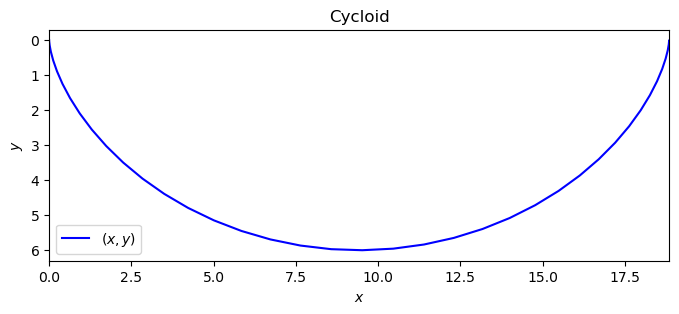

In [59]:
# Let's proceed with plotting
# Open env.
plt.figure(figsize=(8,3))

# Plot
plt.plot(x_test, y_test, color = "blue", linestyle = "-", label = r"$(x,y)$")

# Title with latex syntax
plt.title("Cycloid")

# Axes titles
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

# Legend is added with loc for location
plt.legend(loc=3)

# Invert y axis
plt.gca().invert_yaxis()

# Axes limits
plt.xlim(0,6*np.pi)

# Show/Save
plt.show()